In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Data/November_MyCall_2022.csv")
df1 = pd.read_csv("data/December_MyCall_2022.csv")
df2 = pd.read_csv('data/January_MyCall_2023.csv')
df3 = pd.read_csv("data/February_MyCall_2023.csv")
df4 = pd.read_csv("data/March_MyCall_2023.csv")
df5 = pd.read_csv("data/April_MyCall_2023.csv")
df6 = pd.read_csv("data/March_MyCall_2023.csv")
df7 = pd.read_csv("data/June_MyCall_2023.csv")
df8 = pd.read_csv("data/July_MyCall_2023.csv")
df9 = pd.read_csv("data/August_MyCall_2023.csv")
df10 = pd.read_csv("data/September_MyCall_2023.csv")
df11 = pd.read_csv("data/October_MyCall_2023.csv")

In [3]:
df["month"] = "November"
df1["month"] = "December"
df2["month"] = "January"
df3["month"] = "February"
df4["month"] = "March"
df5["month"] = "April"
df6["month"] = "May"
df7["month"] = "June"
df8["month"] = "July"
df9["month"] = "August"
df10["month"] = "September"
df11["month"] = "October"

In [4]:
dataframes = [df , df1 , df2, df3 , df4, df5, df6 , df7 , df8, df9 , df10 , df11]

for i in dataframes:
    print(i.shape)

(1118, 9)
(1370, 9)
(660, 9)
(577, 9)
(1002, 9)
(475, 9)
(1002, 9)
(527, 9)
(531, 9)
(327, 9)
(370, 9)
(167, 9)


In [5]:
data = pd.concat(dataframes)



In [6]:
data.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name,month
0,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November
1,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November
2,VI,Indoor,Unknown,5,Satisfactory,-1.0,-1.0,NaN,November
3,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November
4,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November


In [7]:
data.shape

(8126, 9)

In [8]:
data.isnull().sum()

operator                0
inout_travelling        0
network_type            0
rating                  0
calldrop_category       0
latitude                0
longitude               0
state_name           3156
month                   0
dtype: int64

In [9]:
data["year"] = data["month"].apply(lambda x: 2022 if x in ["November", "December"] else 2023)

In [10]:
data.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
1,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
2,VI,Indoor,Unknown,5,Satisfactory,-1.0,-1.0,NaN,November,2022
3,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
4,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022


### we have successfully created our data in organize form

- lets begin with some basic statistical analysis of our data

In [11]:
data.shape

(8126, 10)

In [12]:
data.columns

Index(['operator', 'inout_travelling', 'network_type', 'rating',
       'calldrop_category', 'latitude', 'longitude', 'state_name', 'month',
       'year'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8126 entries, 0 to 166
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   operator           8126 non-null   object 
 1   inout_travelling   8126 non-null   object 
 2   network_type       8126 non-null   object 
 3   rating             8126 non-null   int64  
 4   calldrop_category  8126 non-null   object 
 5   latitude           8126 non-null   float64
 6   longitude          8126 non-null   float64
 7   state_name         4970 non-null   object 
 8   month              8126 non-null   object 
 9   year               8126 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 698.3+ KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,8126.0,3.393059,1.566282,1.0,2.0,4.000000,5.000000,5.000000
latitude,8126.0,11.600513,11.415273,-1.0,-1.0,12.956596,19.220111,32.988897
longitude,8126.0,46.644564,38.052408,-1.1,-1.0,73.001939,77.589436,91.100949
year,8126.0,2022.693822,0.460933,2022.0,2022.0,2023.000000,2023.000000,2023.000000


In [15]:
data.isnull().sum()

operator                0
inout_travelling        0
network_type            0
rating                  0
calldrop_category       0
latitude                0
longitude               0
state_name           3156
month                   0
year                    0
dtype: int64

In [16]:
data.duplicated().sum()

3644

In [17]:
data[data.duplicated()].head(30)

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
1,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
3,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
4,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
5,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
6,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
7,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
8,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
9,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
10,VI,Indoor,Unknown,5,Satisfactory,-1.0,-1.0,NaN,November,2022
11,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022


In [18]:
data[data["month"] == "November"].head(60)

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,VI,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,November,2022
1,VI,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,November,2022
2,VI,Indoor,Unknown,5,Satisfactory,-1.000000,-1.000000,NaN,November,2022
3,VI,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,November,2022
4,VI,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,November,2022
5,VI,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,November,2022
6,VI,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,November,2022
7,VI,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,November,2022
8,VI,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,November,2022
9,VI,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,November,2022


In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.duplicated().sum()

0

In [21]:
data.shape

(4482, 10)

### EDA

In [22]:
data.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
2,VI,Indoor,Unknown,5,Satisfactory,-1.0,-1.0,NaN,November,2022
12,RJio,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
13,Airtel,Indoor,Unknown,5,Satisfactory,-1.0,-1.0,NaN,November,2022
14,RJio,Indoor,4G,1,Poor Voice Quality,-1.0,-1.0,NaN,November,2022


In [23]:
data["operator"].unique()

array(['VI', 'RJio', 'Airtel', 'BSNL', 'MTNL'], dtype=object)

In [24]:
data["operator"].value_counts()

operator
Airtel    1998
RJio      1640
VI         713
BSNL       130
MTNL         1
Name: count, dtype: int64

<Axes: xlabel='operator', ylabel='count'>

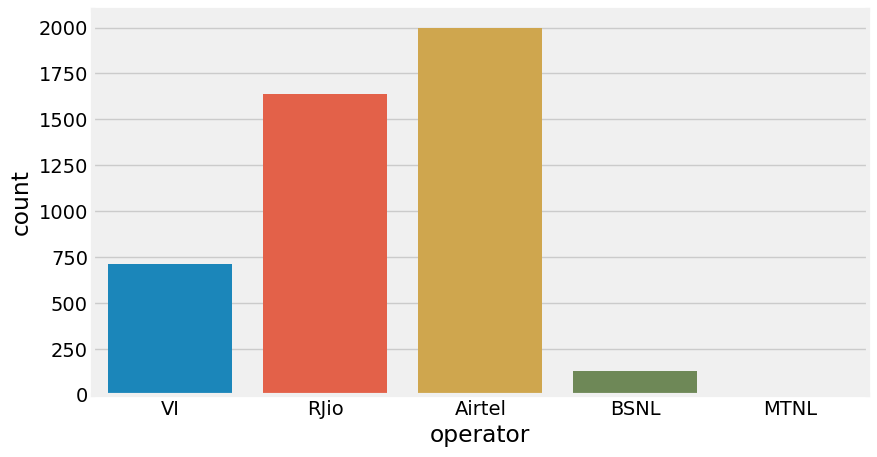

In [25]:
plt.figure(figsize=(10 ,5))
plt.style.use("fivethirtyeight")
sns.countplot(x = "operator" , data = data)

In [26]:
data["inout_travelling"].unique()

array(['Indoor', 'Outdoor', 'Travelling'], dtype=object)

In [27]:
data["inout_travelling"].value_counts()

inout_travelling
Indoor        3097
Outdoor        968
Travelling     417
Name: count, dtype: int64

<Axes: xlabel='inout_travelling', ylabel='count'>

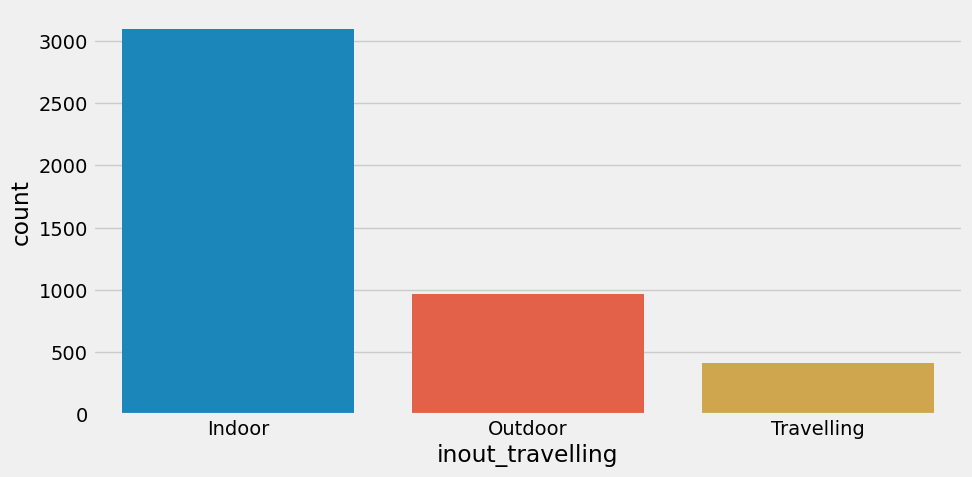

In [28]:
plt.figure(figsize=(10 ,5))
plt.style.use("fivethirtyeight")
sns.countplot(x = "inout_travelling" , data = data)

In [29]:
data["network_type"].unique()

array(['4G', 'Unknown', '2G', '3G'], dtype=object)

In [30]:
data["network_type"].value_counts()

network_type
4G         3013
Unknown    1142
2G          229
3G           98
Name: count, dtype: int64

<Axes: ylabel='count'>

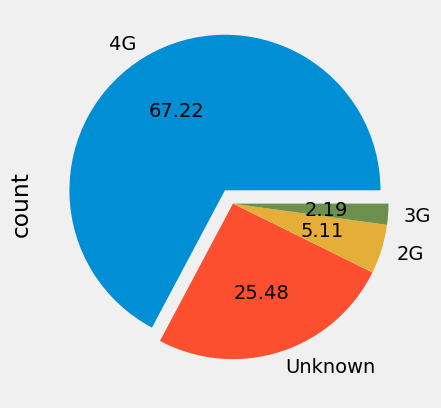

In [31]:
labels = ['4G', 'Unknown', '2G', '3G']
data["network_type"].value_counts().plot(kind="pie", autopct = "%1.2f", explode = [0.1, 0,0,0], labels=labels)

In [32]:
data["rating"].unique()

array([5, 1, 3, 2, 4], dtype=int64)

In [33]:
data["rating"].value_counts()

rating
5    2169
3     796
1     738
4     496
2     283
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

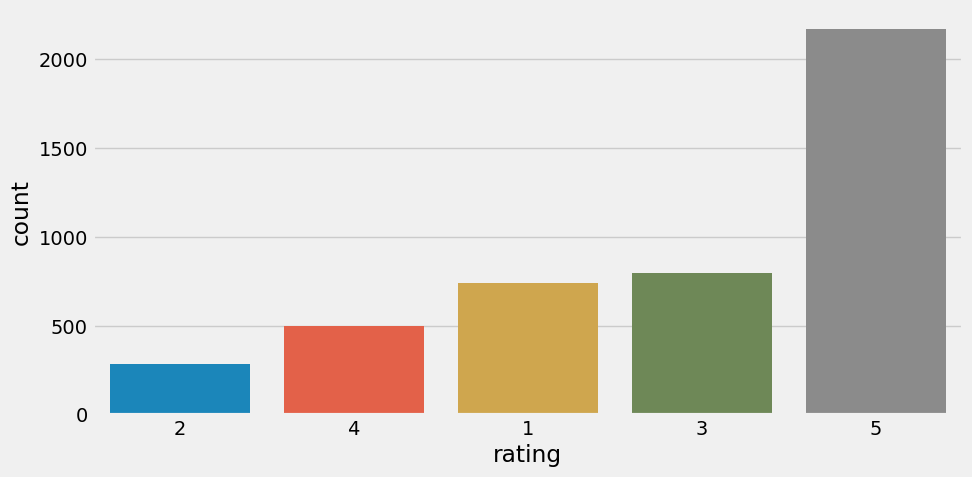

In [34]:
plt.figure(figsize=(10 , 5))
sns.countplot(x = "rating" , data = data, order = data["rating"].value_counts(ascending=True).index)

In [35]:
data["calldrop_category"].unique()

array(['Satisfactory', 'Poor Voice Quality', 'Call Dropped'], dtype=object)

In [36]:
data["calldrop_category"].value_counts()

calldrop_category
Satisfactory          3343
Poor Voice Quality     874
Call Dropped           265
Name: count, dtype: int64

<Axes: ylabel='count'>

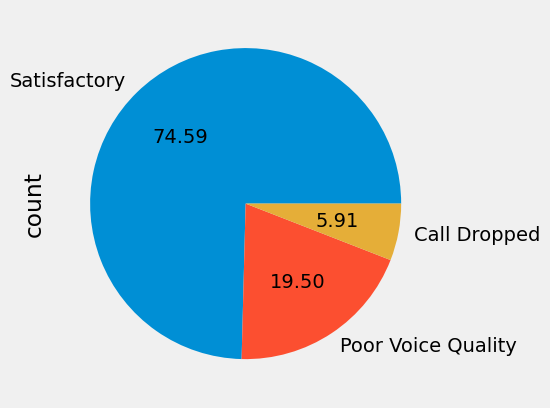

In [37]:
data["calldrop_category"].value_counts().plot(kind = "pie" , autopct = "%1.2f")

In [38]:
data["longitude"].unique()

array([-1.        , 73.833598  , 73.8340625 , ..., 77.708385  ,
       77.4896517 , 77.52841017])

C:\Users\shailesh.gaddam\AppData\Local\Temp\ipykernel_28156\1514244432.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["longitude"],bins=50)


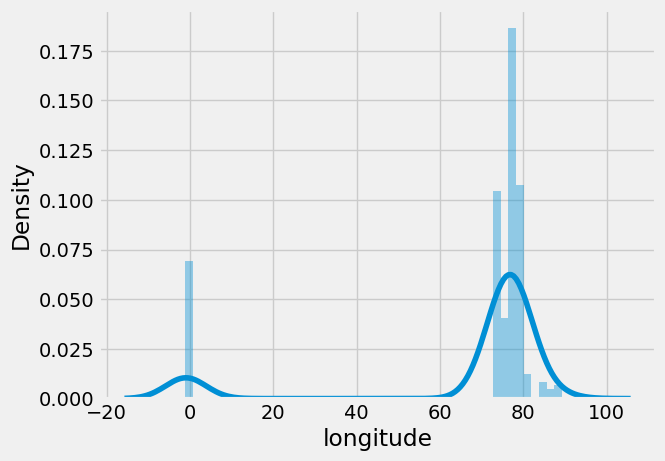

In [39]:
sns.distplot(data["longitude"],bins=50)
plt.show()

In [40]:
data["latitude"].unique()

array([-1.        , 18.5081856 , 18.5079525 , ..., 13.19951833,
       12.9565896 , 28.57905087])

C:\Users\shailesh.gaddam\AppData\Local\Temp\ipykernel_28156\633065921.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["latitude"])


<Axes: xlabel='latitude', ylabel='Density'>

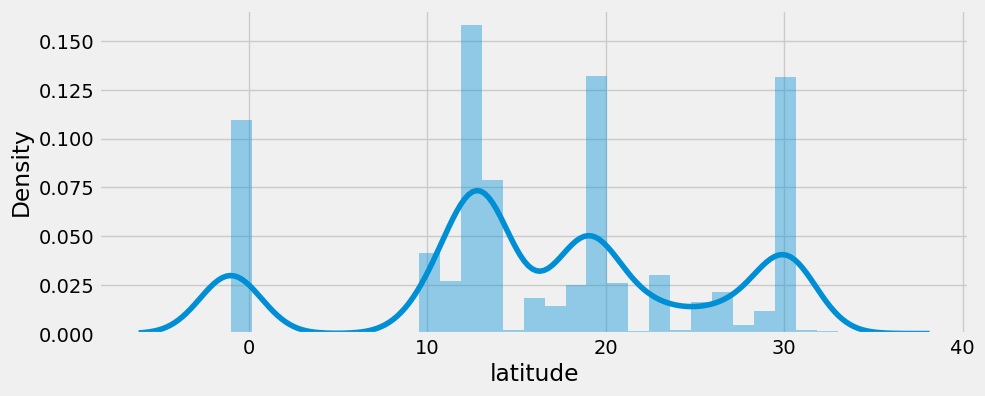

In [41]:
plt.figure(figsize=(10 , 4))
sns.distplot(data["latitude"])

In [42]:
data["state_name"].unique()

array([nan, 'Maharashtra', 'Karnataka', 'Rajasthan', 'Bihar',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal', 'Tamil Nadu',
       'Delhi', 'Jharkhand', 'Haryana', 'Madhya Pradesh', 'Telangana',
       'Assam', 'Kerala', 'Andhra Pradesh', 'Gujarat', 'Laccadives',
       'Odisha', 'Chhattisgarh', 'Goa', 'Unnamed: 7', 'Kashmir', 'Punjab',
       'Chandigarh', 'NCT'], dtype=object)

In [43]:
data["state_name"].value_counts()

state_name
Karnataka         1265
Maharashtra        943
Uttarakhand        680
Kerala             343
Rajasthan          115
Uttar Pradesh       81
Tamil Nadu          66
West Bengal         59
Jharkhand           58
Telangana           56
Madhya Pradesh      51
Bihar               46
Andhra Pradesh      32
Haryana             30
Gujarat             25
Delhi               15
Chhattisgarh        10
Punjab               8
Kashmir              6
Odisha               6
Goa                  6
Chandigarh           2
Assam                2
NCT                  2
Unnamed: 7           1
Laccadives           1
Name: count, dtype: int64

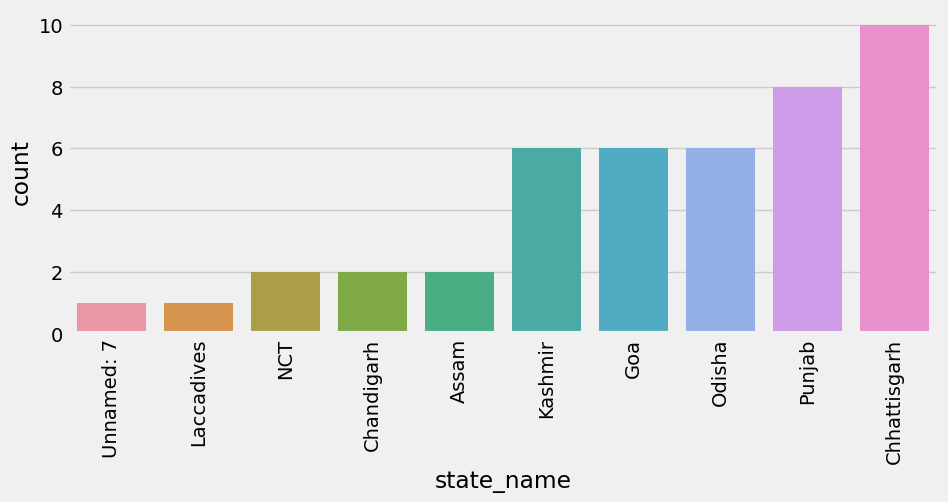

In [44]:
plt.figure(figsize=(10 , 4))
sns.countplot(x = "state_name", data = data, order = data["state_name"].value_counts(ascending=True).head(10).index)
plt.xticks(rotation = 90)
plt.show()

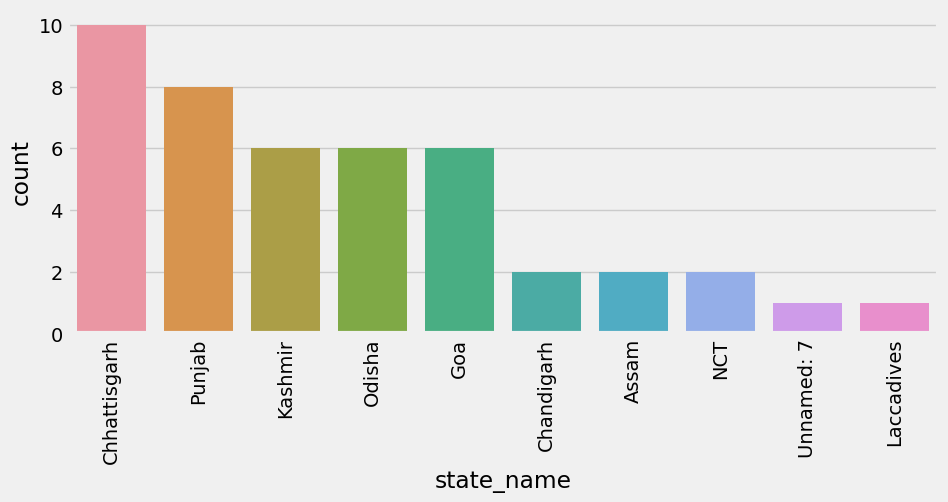

In [45]:
plt.figure(figsize=(10 , 4))
sns.countplot(x = "state_name", data = data, order = data["state_name"].value_counts(ascending=False).tail(10).index)
plt.xticks(rotation = 90)
plt.show()

In [46]:
data["month"].unique()

array(['November', 'December', 'January', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October'],
      dtype=object)

In [47]:
data["month"].value_counts()

month
March        560
May          560
November     553
December     534
January      435
February     403
June         340
July         284
April        253
August       235
September    229
October       96
Name: count, dtype: int64

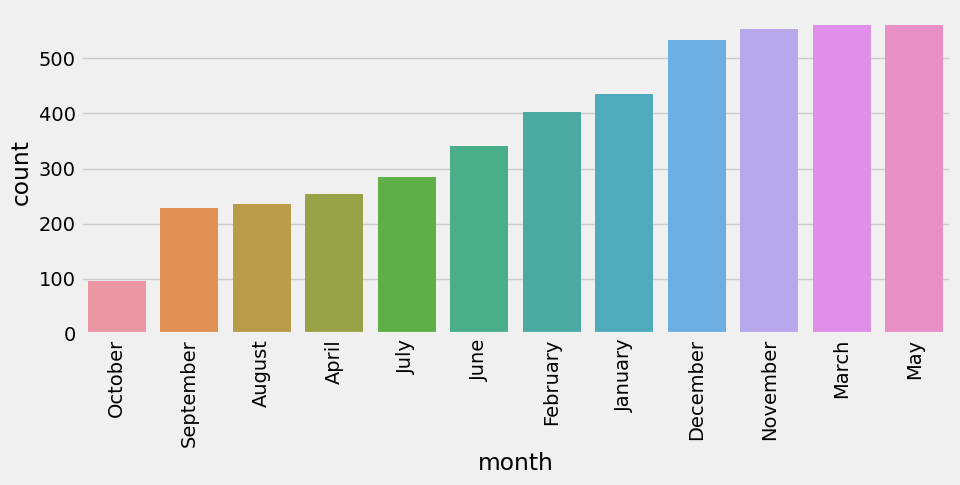

In [48]:
plt.figure(figsize=(10, 4))
sns.countplot(x = "month",data = data, order = data["month"].value_counts(ascending = True).index)
plt.xticks(rotation = 90)
plt.show()

In [49]:
data["year"].unique()

array([2022, 2023], dtype=int64)

In [50]:
data["year"].value_counts()

year
2023    3395
2022    1087
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='count'>

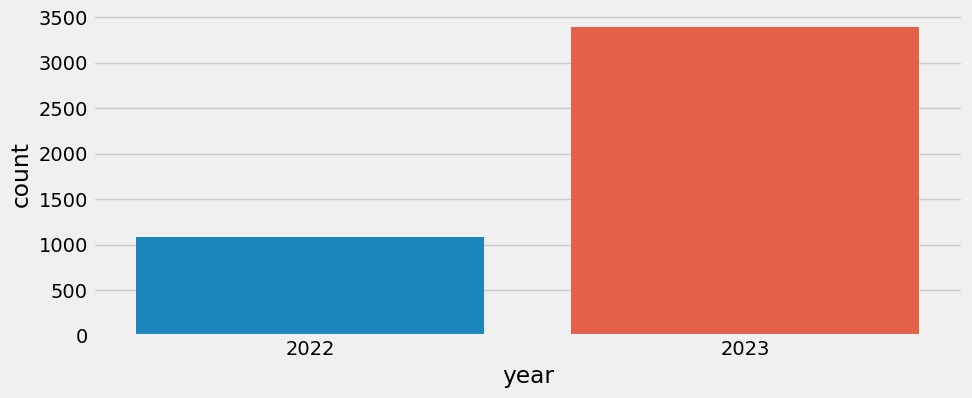

In [51]:
plt.figure(figsize=(10,4))
sns.countplot(x = "year", data = data)

In [52]:
data.head(3)

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
2,VI,Indoor,Unknown,5,Satisfactory,-1.0,-1.0,NaN,November,2022
12,RJio,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022


<Axes: xlabel='operator', ylabel='rating'>

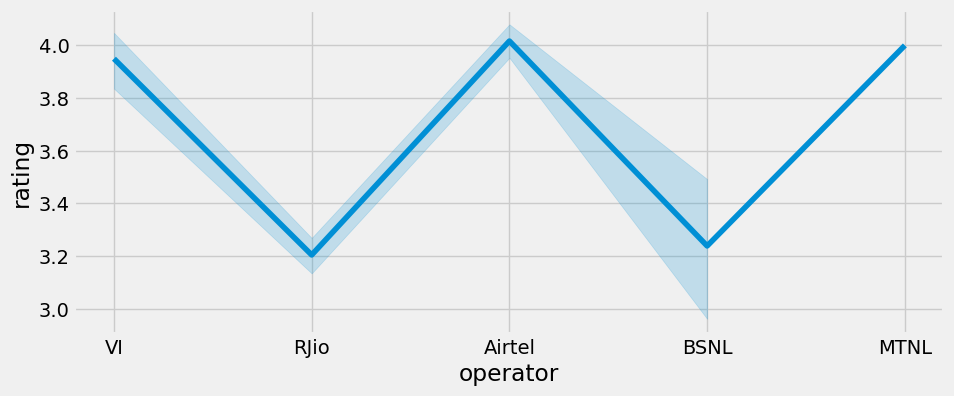

In [53]:
plt.figure(figsize=(10,4))
sns.lineplot(x = "operator", y = "rating", data = data)

<Axes: xlabel='inout_travelling', ylabel='rating'>

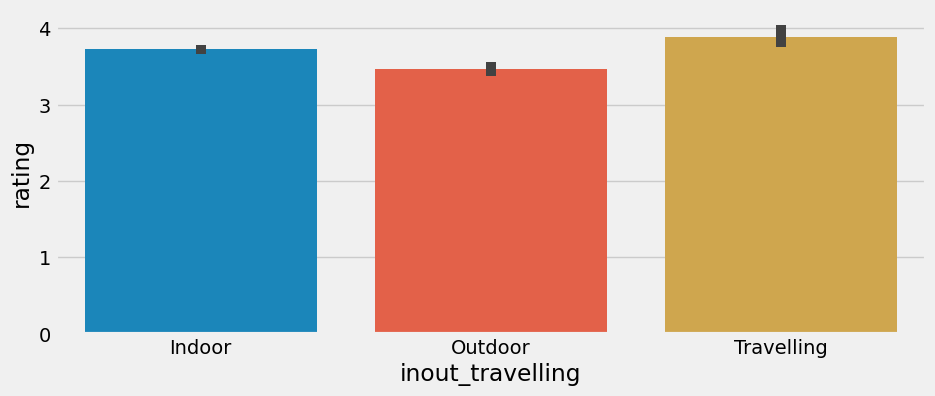

In [54]:
plt.figure(figsize=(10,4))
sns.barplot(x = "inout_travelling", y = "rating", data = data)

<Axes: xlabel='network_type', ylabel='rating'>

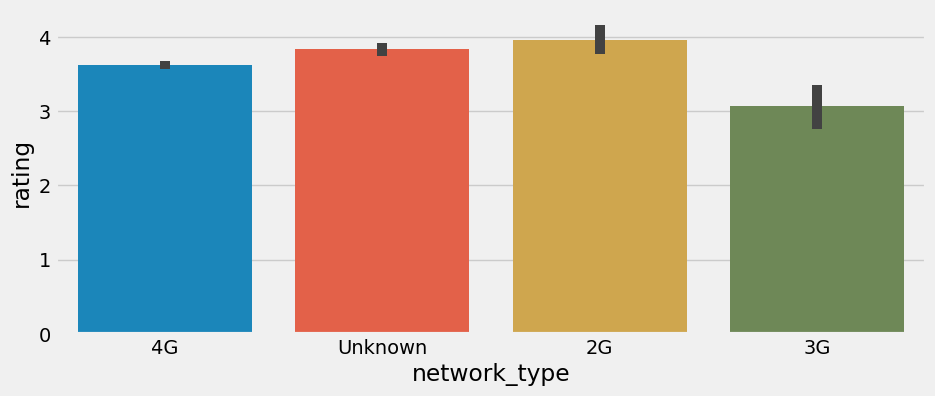

In [55]:
plt.figure(figsize=(10,4))
sns.barplot(x = "network_type", y = "rating", data = data)

<Axes: xlabel='calldrop_category', ylabel='rating'>

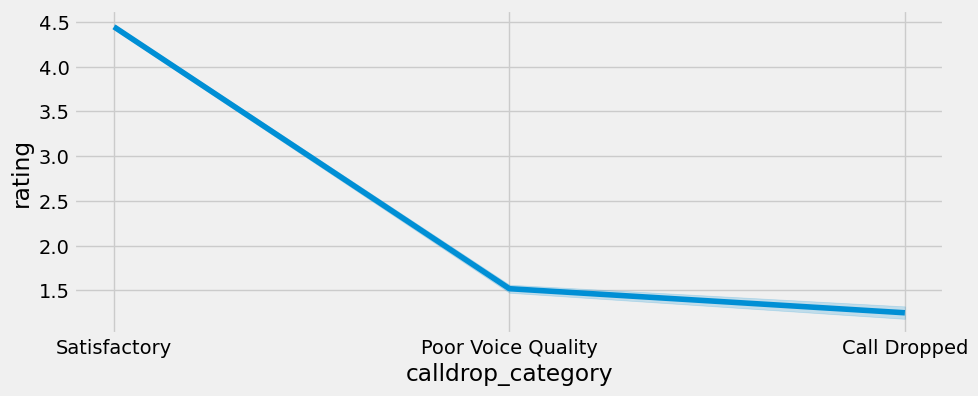

In [56]:
plt.figure(figsize=(10,4))
sns.lineplot(x = "calldrop_category", y = "rating", data = data)

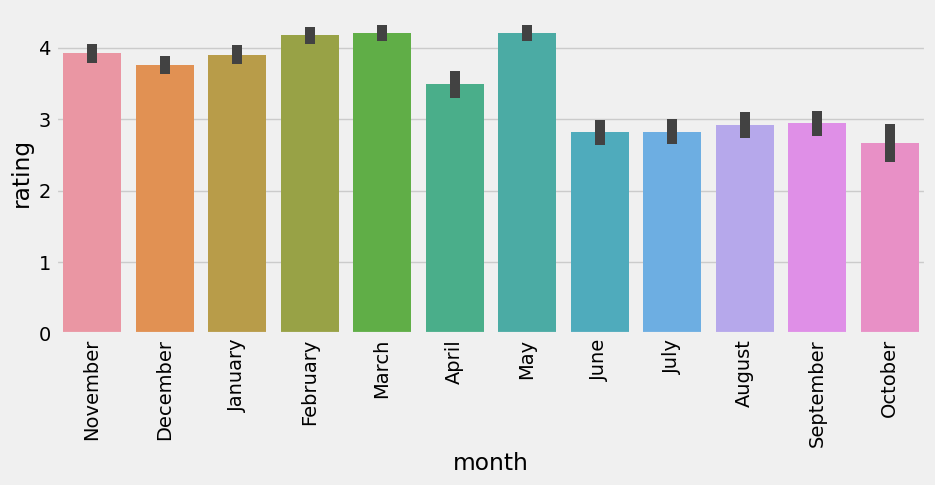

In [57]:
plt.figure(figsize=(10,4))
sns.barplot(x = "month", y = "rating", data = data)
plt.xticks(rotation = 90)
plt.show()

In [58]:
data.head(2)

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,VI,Indoor,4G,5,Satisfactory,-1.0,-1.0,NaN,November,2022
2,VI,Indoor,Unknown,5,Satisfactory,-1.0,-1.0,NaN,November,2022


<Axes: xlabel='rating'>

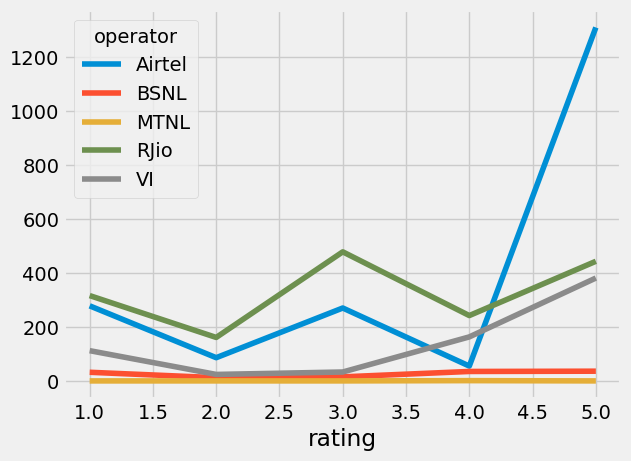

In [59]:
pd.crosstab(data["rating"] , data["operator"]).plot()

<Axes: xlabel='rating'>

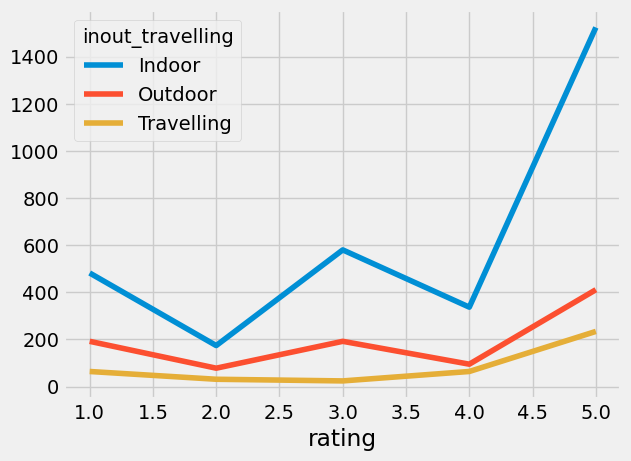

In [60]:
pd.crosstab(data["rating"] , data["inout_travelling"]).plot()

<Axes: xlabel='rating'>

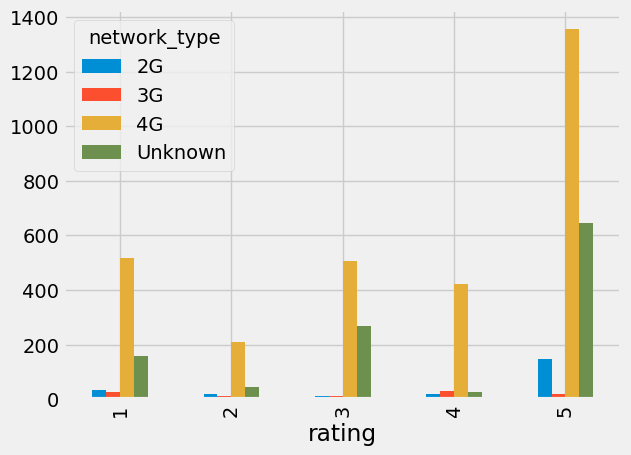

In [61]:
pd.crosstab(data["rating"] , data["network_type"]).plot(kind="bar")

<Axes: xlabel='rating'>

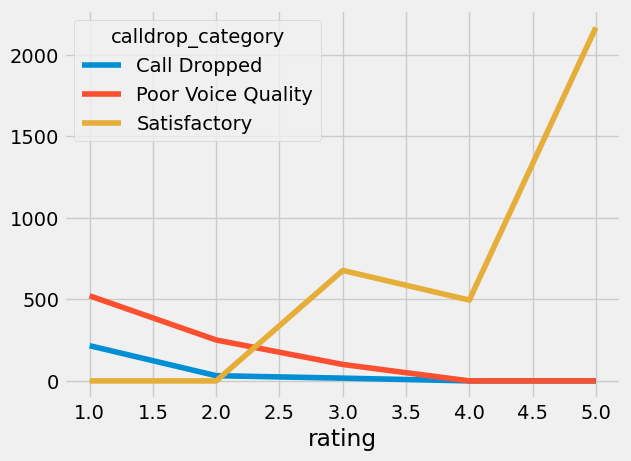

In [62]:
pd.crosstab(data["rating"] , data["calldrop_category"]).plot()

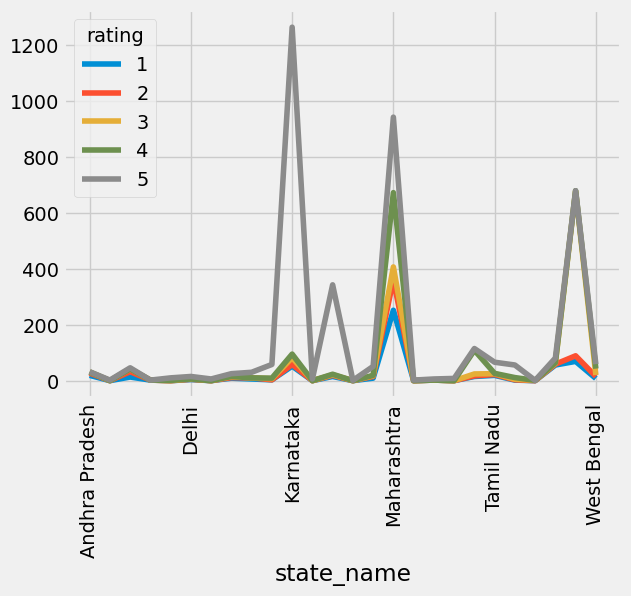

In [63]:
pd.crosstab(data["state_name"],data["rating"]).plot(stacked = True)
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x500 with 0 Axes>

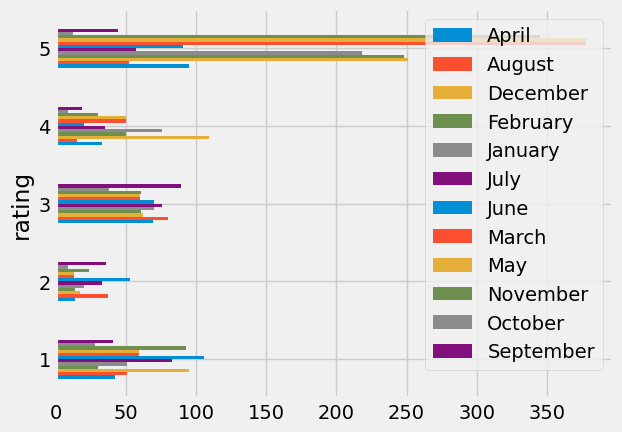

In [64]:
plt.figure(figsize=(10 , 5))
pd.crosstab(data["rating"],data["month"]).plot(kind="barh")
plt.legend()

### Feature Engineering

In [65]:
data.isnull().sum()

operator               0
inout_travelling       0
network_type           0
rating                 0
calldrop_category      0
latitude               0
longitude              0
state_name           573
month                  0
year                   0
dtype: int64

In [66]:
data["state_name"] = data["state_name"].fillna(data["state_name"].mode()[0])

In [67]:
data.isnull().sum()

operator             0
inout_travelling     0
network_type         0
rating               0
calldrop_category    0
latitude             0
longitude            0
state_name           0
month                0
year                 0
dtype: int64

In [68]:
data["state_name"].value_counts()

state_name
Karnataka         1838
Maharashtra        943
Uttarakhand        680
Kerala             343
Rajasthan          115
Uttar Pradesh       81
Tamil Nadu          66
West Bengal         59
Jharkhand           58
Telangana           56
Madhya Pradesh      51
Bihar               46
Andhra Pradesh      32
Haryana             30
Gujarat             25
Delhi               15
Chhattisgarh        10
Punjab               8
Kashmir              6
Odisha               6
Goa                  6
Chandigarh           2
Assam                2
NCT                  2
Unnamed: 7           1
Laccadives           1
Name: count, dtype: int64

In [69]:
cat_features = [feature for feature in data.columns if data[feature].dtypes == "O"]

In [70]:
le = LabelEncoder()
for i in cat_features:
    data[i] = le.fit_transform(data[i])

In [71]:
data.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,4,0,2,5,2,-1.0,-1.0,10,9,2022
2,4,0,3,5,2,-1.0,-1.0,10,9,2022
12,3,0,2,5,2,-1.0,-1.0,10,9,2022
13,0,0,3,5,2,-1.0,-1.0,10,9,2022
14,3,0,2,1,1,-1.0,-1.0,10,9,2022


In [72]:
data_corr = data.corr()

<Axes: >

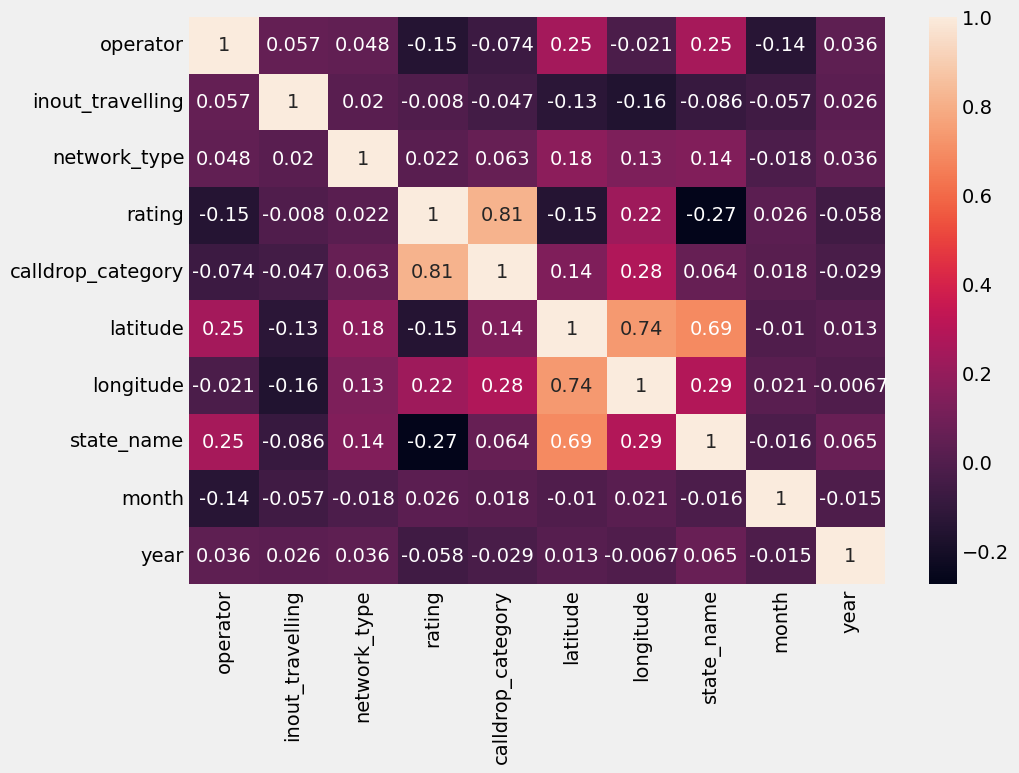

In [73]:
plt.figure(figsize=(10 , 7))
sns.heatmap(data_corr, annot=True)

In [74]:
x = data.drop("calldrop_category", axis=1)
y = data["calldrop_category"]

In [75]:
x_train , x_test , y_train, y_test = train_test_split(x,y , test_size=0.3 , random_state=42)

In [76]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [77]:
x_train

array([[-1.07755585, -0.6189246 ,  1.27203616, ..., -0.72704928,
         0.82679999,  0.56299248],
       [ 0.73655472, -0.6189246 , -0.17009519, ...,  0.16421824,
        -1.44124511,  0.56299248],
       [-1.07755585, -0.6189246 , -0.17009519, ...,  1.76849978,
         1.15080644, -1.77622265],
       ...,
       [-1.07755585, -0.6189246 , -0.17009519, ..., -0.37054227,
         0.82679999,  0.56299248],
       [ 0.73655472, -0.6189246 ,  1.27203616, ...,  1.76849978,
        -0.14521934,  0.56299248],
       [ 1.34125825,  0.90387263,  1.27203616, ...,  0.16421824,
        -1.11723867, -1.77622265]])

In [78]:
x_test

array([[-1.07755585, -0.6189246 , -0.17009519, ..., -0.72704928,
         1.15080644, -1.77622265],
       [ 0.73655472, -0.6189246 , -0.17009519, ...,  0.16421824,
        -1.44124511,  0.56299248],
       [-1.07755585,  0.90387263, -0.17009519, ..., -0.90530278,
        -1.11723867, -1.77622265],
       ...,
       [ 0.73655472,  2.42666987, -0.17009519, ..., -0.72704928,
         0.17878711,  0.56299248],
       [-1.07755585, -0.6189246 , -0.17009519, ..., -0.72704928,
         1.15080644, -1.77622265],
       [ 0.73655472,  0.90387263, -0.17009519, ...,  0.16421824,
        -1.11723867, -1.77622265]])

In [79]:
x_train.shape

(3137, 9)

In [80]:
x_test.shape

(1345, 9)

### Model Building

In [81]:
lg = LogisticRegression()
lg.fit(x_train , y_train)
lg_pred = lg.predict(x_test)

In [82]:
lg.score(x_test , y_test)

0.9271375464684015

In [83]:
print("Training Accuracy", lg.score(x_train , y_train))
print("Testing Accuracy", lg.score(x_test , y_test))

Training Accuracy 0.9190309212623525
Testing Accuracy 0.9271375464684015


In [84]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
dt_pred = dt.predict(x_test)

In [85]:
dt.score(x_test , y_test)

0.8996282527881041

In [86]:
print("Training Accuracy", dt.score(x_train , y_train))
print("Testing Accuracy", dt.score(x_test , y_test))

Training Accuracy 0.9856550844756137
Testing Accuracy 0.8996282527881041


In [87]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
rf_pred = rf.predict(x_test)

In [88]:
rf.score(x_test , y_test)

0.9137546468401487

In [89]:
print("Training Accuracy", rf.score(x_train , y_train))
print("Testing Accuracy", rf.score(x_test , y_test))

Training Accuracy 0.9856550844756137
Testing Accuracy 0.9137546468401487


In [91]:
data.to_csv("Final_Voice_Quality")

In [92]:
import pickle
file = "rf_model.pkl"

pickle.dump(rf , open(file, "wb"))